# Paper 1: The First Law of Complexodynamics
## Scott Aaronson

### Implementation: Cellular Automata and Entropy Growth

This notebook demonstrates how complexity and entropy increase in closed systems using cellular automata.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

np.random.seed(42)

## 1D Cellular Automaton (Rule 30 - Chaotic)

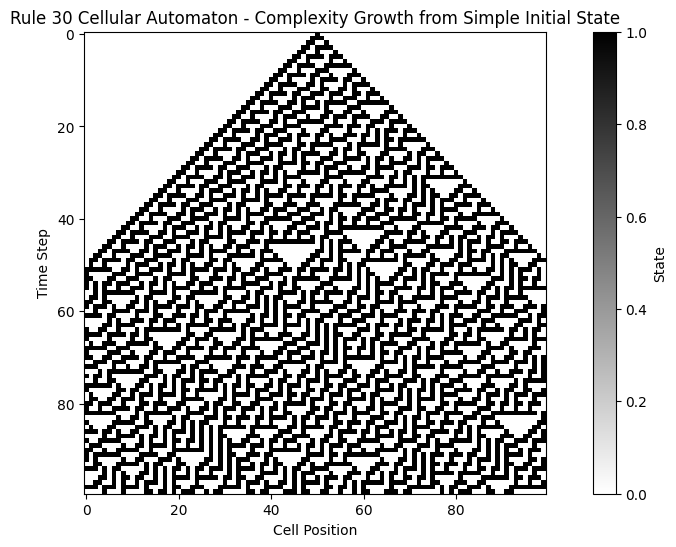

In [2]:
def rule_30(left, center, right):
    """Rule 30: Generates complex, chaotic patterns"""
    pattern = (left << 2) | (center << 1) | right
    rule = 30
    return (rule >> pattern) & 1

def evolve_ca(initial_state, steps, rule_func):
    """Evolve cellular automaton"""
    size = len(initial_state)
    history = np.zeros((steps, size), dtype=int)
    history[0] = initial_state
    
    for t in range(1, steps):
        for i in range(size):
            left = history[t-1, (i-1) % size]
            center = history[t-1, i]
            right = history[t-1, (i+1) % size]
            history[t, i] = rule_func(left, center, right)
    
    return history

# Simple initial state
size = 100
initial = np.zeros(size, dtype=int)
initial[size // 2] = 1  # Single cell in center

# Evolve
steps = 100
evolution = evolve_ca(initial, steps, rule_30)

plt.figure(figsize=(12, 6))
plt.imshow(evolution, cmap='binary', interpolation='nearest')
plt.title('Rule 30 Cellular Automaton - Complexity Growth from Simple Initial State')
plt.xlabel('Cell Position')
plt.ylabel('Time Step')
plt.colorbar(label='State')
plt.show()

## Measuring Complexity Growth via Entropy

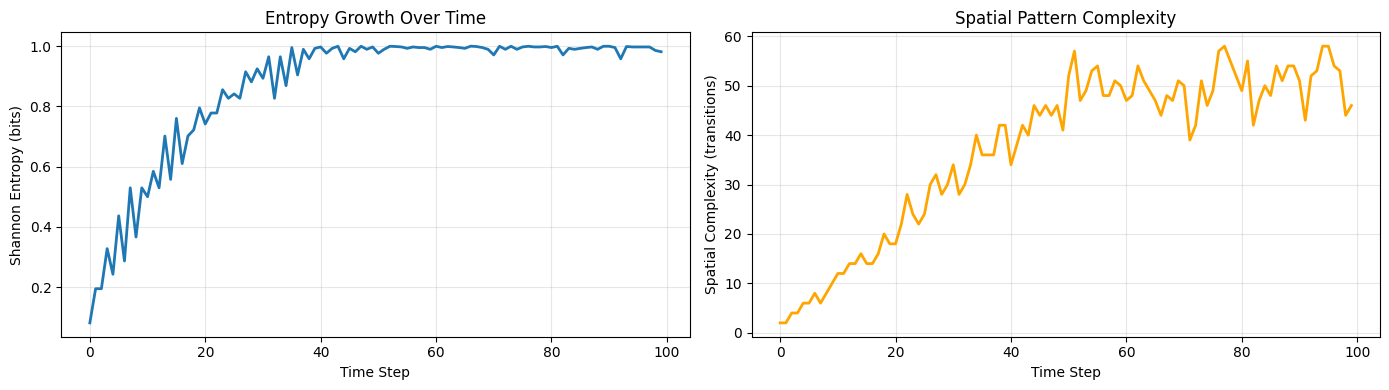

Initial Entropy: 0.0808 bits
Final Entropy: 0.9815 bits
Entropy Increase: 0.9007 bits


In [3]:
def measure_entropy_over_time(history):
    """Measure Shannon entropy at each time step"""
    entropies = []
    
    for t in range(len(history)):
        state = history[t]
        # Calculate probability distribution
        unique, counts = np.unique(state, return_counts=True)
        probs = counts / len(state)
        ent = entropy(probs, base=2)
        entropies.append(ent)
    
    return np.array(entropies)

def measure_spatial_complexity(history):
    """Measure spatial pattern complexity (number of transitions)"""
    complexities = []
    
    for t in range(len(history)):
        state = history[t]
        # Count transitions between adjacent cells
        transitions = np.sum(np.abs(np.diff(state)))
        complexities.append(transitions)
    
    return np.array(complexities)

entropies = measure_entropy_over_time(evolution)
complexities = measure_spatial_complexity(evolution)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

ax1.plot(entropies, linewidth=2)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('Shannon Entropy (bits)')
ax1.set_title('Entropy Growth Over Time')
ax1.grid(True, alpha=0.3)

ax2.plot(complexities, linewidth=2, color='orange')
ax2.set_xlabel('Time Step')
ax2.set_ylabel('Spatial Complexity (transitions)')
ax2.set_title('Spatial Pattern Complexity')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial Entropy: {entropies[0]:.4f} bits")
print(f"Final Entropy: {entropies[-1]:.4f} bits")
print(f"Entropy Increase: {entropies[-1] - entropies[0]:.4f} bits")

## The Coffee Automaton: Irreversible Mixing

Demonstrating that simple initial states evolve to complex patterns (like cream mixing in coffee) but the reverse is improbable.

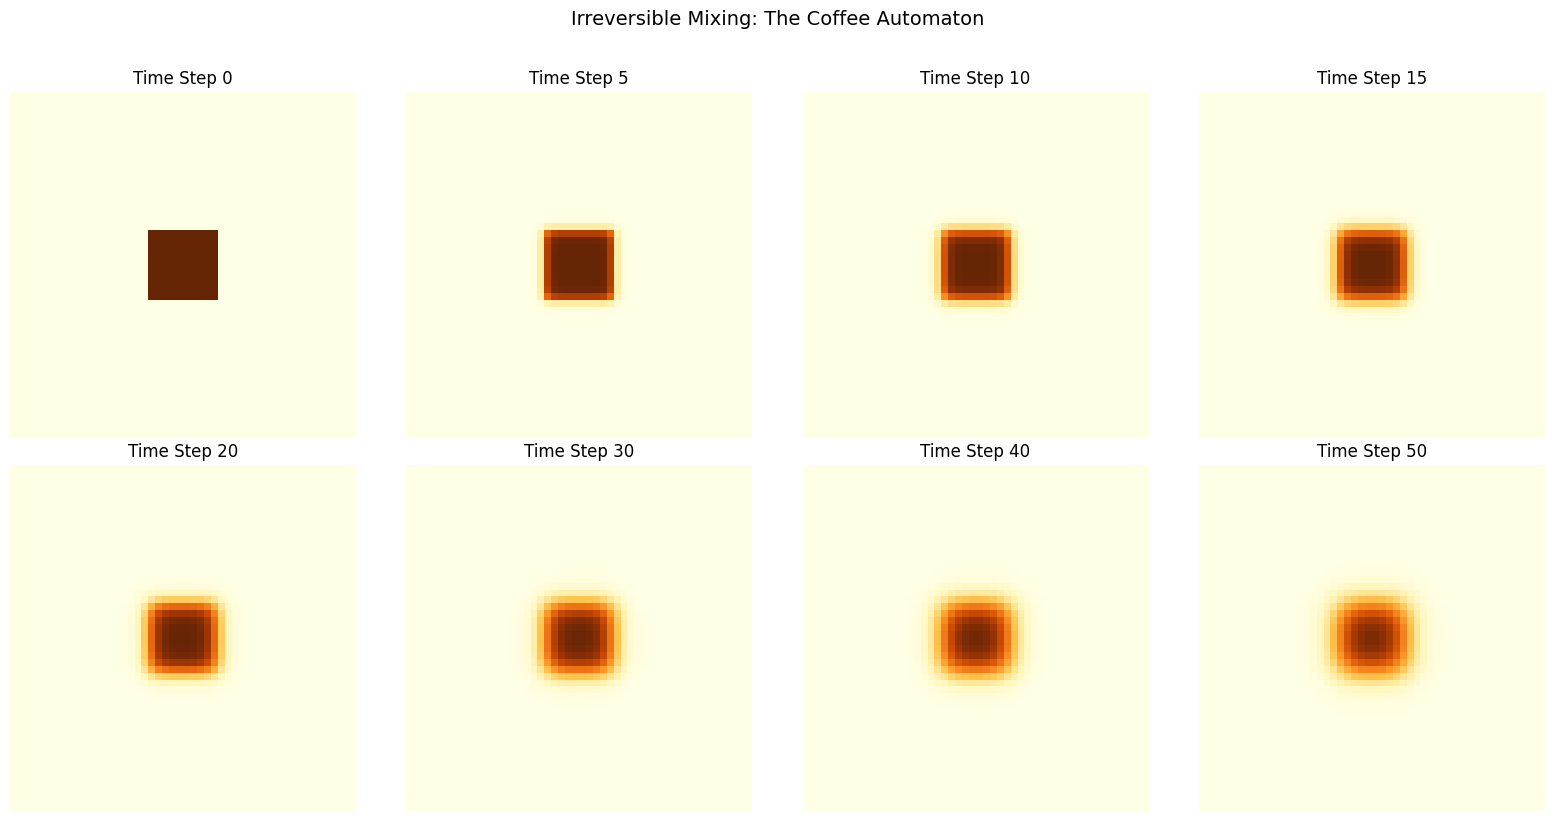

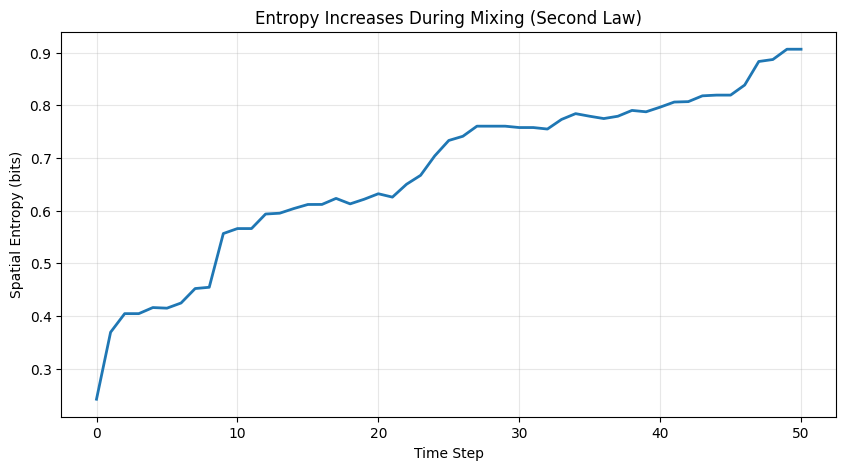


Key Insight: Simple concentrated state → Complex mixed state
This process is irreversible: you can't unmix coffee!


In [4]:
def diffusion_2d(grid, steps, diffusion_rate=0.1):
    """Simple 2D diffusion simulation"""
    history = [grid.copy()]
    
    for _ in range(steps):
        new_grid = grid.copy()
        h, w = grid.shape
        
        for i in range(1, h-1):
            for j in range(1, w-1):
                # Average with neighbors
                neighbors = (
                    grid[i-1, j] + grid[i+1, j] + 
                    grid[i, j-1] + grid[i, j+1]
                ) / 4
                new_grid[i, j] = (
                    (1 - diffusion_rate) * grid[i, j] + 
                    diffusion_rate * neighbors
                )
        
        grid = new_grid
        history.append(grid.copy())
    
    return np.array(history)

# Create initial state: concentrated "cream" in coffee
size = 50
grid = np.zeros((size, size))
grid[20:30, 20:30] = 1.0  # Concentrated region

# Simulate mixing
mixing_history = diffusion_2d(grid, steps=50, diffusion_rate=0.2)

# Visualize mixing process
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
timesteps = [0, 5, 10, 15, 20, 30, 40, 50]

for idx, (ax, t) in enumerate(zip(axes.flat, timesteps)):
    ax.imshow(mixing_history[t], cmap='YlOrBr', vmin=0, vmax=1)
    ax.set_title(f'Time Step {t}')
    ax.axis('off')

plt.suptitle('Irreversible Mixing: The Coffee Automaton', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Measure entropy growth in mixing
mixing_entropies = []
for t in range(len(mixing_history)):
    flat = mixing_history[t].flatten()
    # Discretize for entropy calculation
    bins = np.histogram(flat, bins=20)[0]
    probs = bins[bins > 0] / bins.sum()
    mixing_entropies.append(entropy(probs, base=2))

plt.figure(figsize=(10, 5))
plt.plot(mixing_entropies, linewidth=2)
plt.xlabel('Time Step')
plt.ylabel('Spatial Entropy (bits)')
plt.title('Entropy Increases During Mixing (Second Law)')
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nKey Insight: Simple concentrated state → Complex mixed state")
print(f"This process is irreversible: you can't unmix coffee!")

## Key Takeaways

1. **Complexity Growth**: Simple initial states evolve into complex patterns
2. **Entropy Increase**: Closed systems tend toward higher entropy (Second Law)
3. **Irreversibility**: Complex states are unlikely to spontaneously return to simple states
4. **Computational Irreversibility**: The Coffee Automaton demonstrates fundamental limits

This connects to deep learning through:
- Understanding of information theory
- Complexity of learned representations
- Entropy in loss functions and regularization